In [44]:
import numpy as np
import pandas as pd
from importlib import reload
from matplotlib import pylab as plt
plt.rcParams["legend.loc"] = "upper left"
plt.rcParams['text.usetex'] = True

from files.gradient_approximation import *
from files.optimizers import *
from files.sets import *
from files.utils import *
from files.run_experiments import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## None-stochastic FW LogReg on L2-ball (Mushrooms)

In [29]:
func_name = "logreg"
d = 112
seed = 42
sigma = 0
sett = L2Ball(radius=1)
L = 5.25

args = init_experiment(func_name, d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [30]:
def learning_rate(k):
    return 1 / L

In [31]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 185.64it/s]


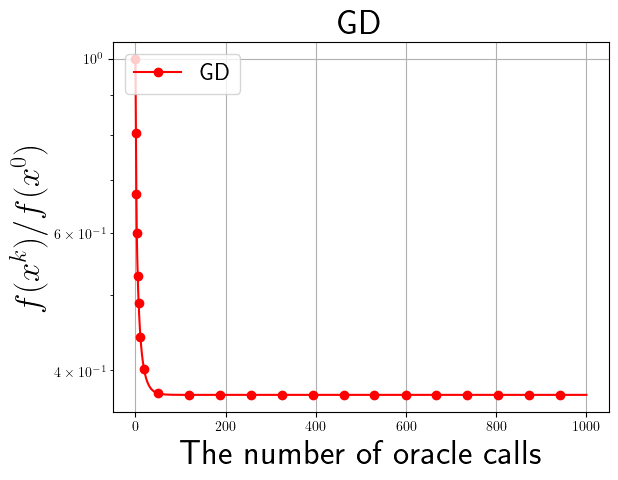

0.9999999999999999


In [32]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [33]:
def learning_rate_jaguar(k):
    return (np.sqrt(k) + 1) / (k + 20000)

def learning_rate_lame(k):
    return (np.sqrt(k) + 1) / (k + 50000)

def learning_rate_turtle(k):
    return 1 / (k + L)

In [34]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [35]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5*10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 22/22 [00:09<00:00,  2.28it/s]


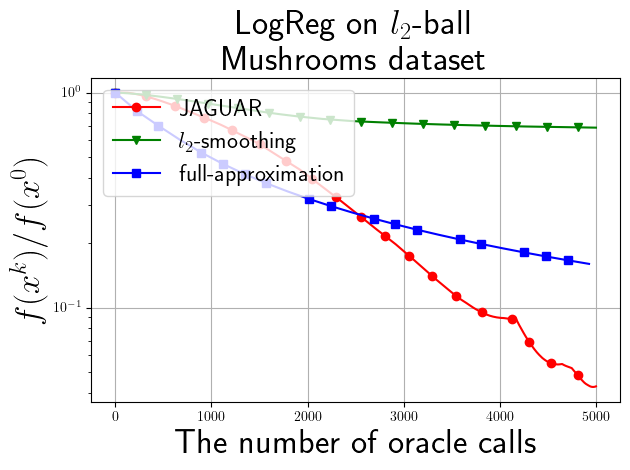

In [36]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_LogReg_L2_Mushrooms")

## None-stochastic FW LogReg on L2-ball (MNIST)

In [66]:
func_name = "logreg"
d = 719
seed = 42
sigma = 0
sett = L2Ball(radius=1)
L = 5.25

args = init_experiment(func_name, dataset="MNIST", d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [67]:
def learning_rate(k):
    return 1 / L

In [68]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|███████████████████████████████████████| 1000/1000 [00:33<00:00, 30.15it/s]


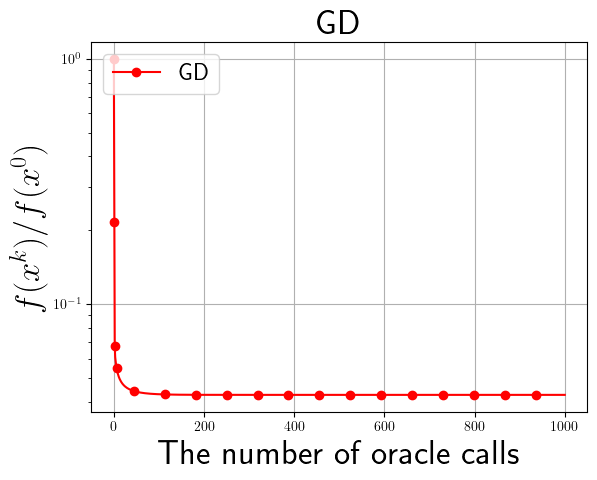

1.0


In [69]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [116]:
def learning_rate_jaguar(k):
    return 1 / (k + 200)

def learning_rate_lame(k):
    return (np.sqrt(k) + 1) / (k + 50000)

def learning_rate_turtle(k):
    return 3 / (k + 30)

In [117]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [118]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [06:28<00:00, 64.69s/it]


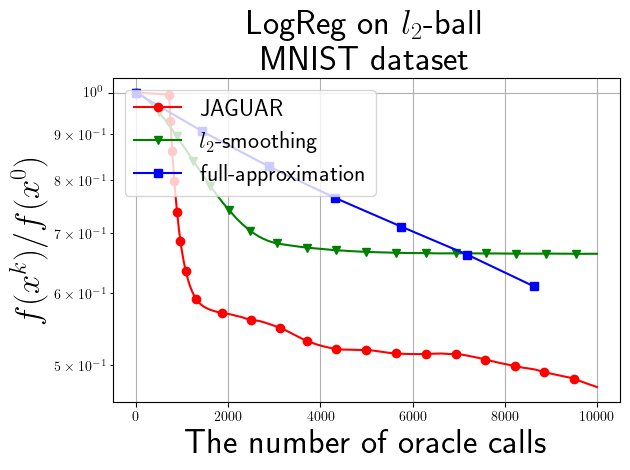

In [119]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_LogReg_L2_MNIST")

## None-stochastic FW Reg on L2-ball

In [62]:
func_name = "quadratic"
d = 200
seed = 42
sigma = 0
sett = L2Ball(radius=1)
L = 1000
mu = 1

args = init_experiment(func_name, d=d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [63]:
def learning_rate(k):
    return 1 / L

In [64]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**4)
GD.optimize()

  2%|▉                                      | 249/10000 [00:09<06:15, 25.99it/s]

Precision 1e-06 achieved at step 249!


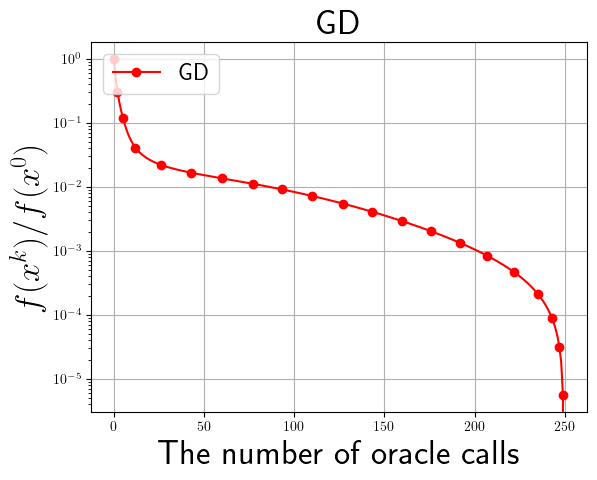

0.9999999999999999


In [65]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [100]:
def learning_rate_jaguar(k):
    return 1 / (k + 100)

def learning_rate_lame(k):
    return 1 / (k + 20)

def learning_rate_turtle(k):
    return 1 / (k + 100)

In [101]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [102]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5*10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████| 125/125 [00:01<00:00, 75.38it/s]


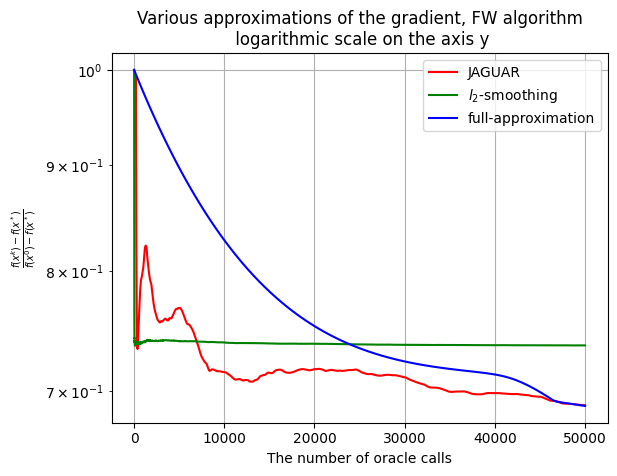

In [103]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_Reg_L2")

## None-stochastic FW SVM on L2-ball (Mushrooms)

In [119]:
func_name = "SVM"
d = 112
seed = 42
sigma = 0
sett = L2Ball(radius=1)
L = 5.25

args = init_experiment(func_name, d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [124]:
def learning_rate_jaguar(k):
    return 1 / (k + 200)

def learning_rate_lame(k):
    return 1 / (k + 200)

def learning_rate_turtle(k):
    return 1 / (k + 10)

In [125]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [128]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [00:02<00:00, 18.57it/s]


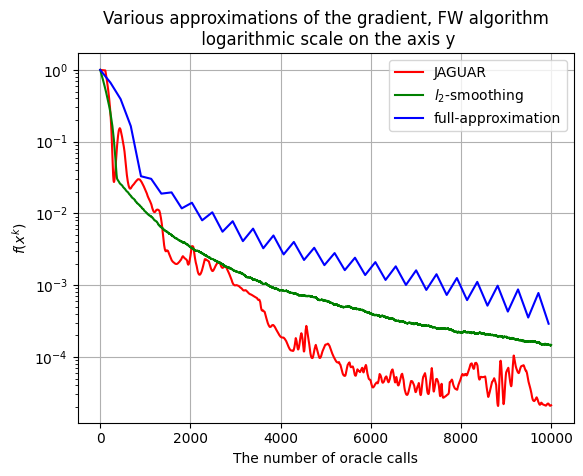

In [129]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_SVM_L2_Mushrooms")

## None-stochastic FW SVM on L2-ball (MNIST)

In [129]:
func_name = "SVM"
d = 719
seed = 42
sigma = 0
sett = L2Ball(radius=0.5)
L = 5.25

args = init_experiment(func_name, dataset="MNIST", d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [172]:
def learning_rate_jaguar(k):
    return 1 / (1.8 * k + 600)

def learning_rate_lame(k):
    return 1 / (k + 600)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (k + 8)

In [173]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [174]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [00:05<00:00,  1.06it/s]


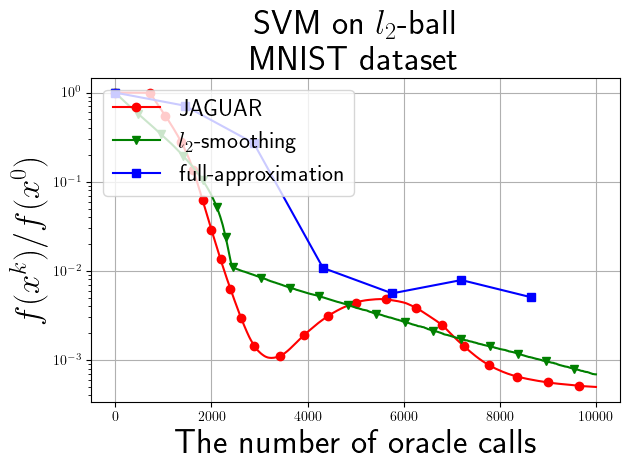

In [175]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_SVM_L2_MNIST")

## Stochastic OPF FW LogReg on L2-ball (Mushrooms)

In [180]:
func_name = "logreg"
d = 112
seed = 42
sigma = 1
sett = L2Ball(radius=1)
L = 5.25

args = init_experiment(func_name, d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [181]:
def learning_rate(k):
    return 1 / L

In [182]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 168.64it/s]


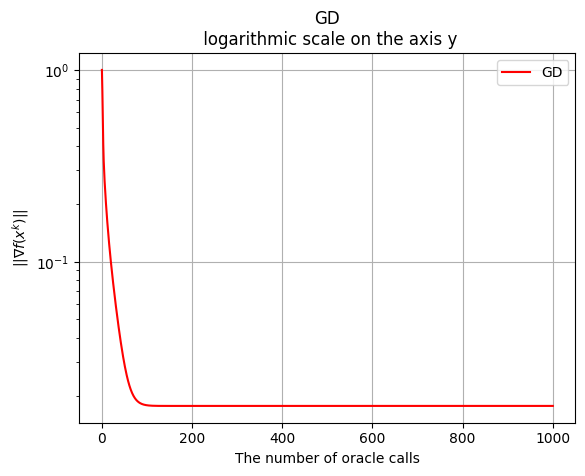

0.9999999999999999


In [183]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [194]:
def learning_rate_jaguar(k):
    return 1 / (k + 50)

def learning_rate_lame(k):
    return 1 / (k + 20)

def learning_rate_turtle(k):
    return 1 / (k + 20)

In [195]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [196]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [197]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 22/22 [00:12<00:00,  1.80it/s]


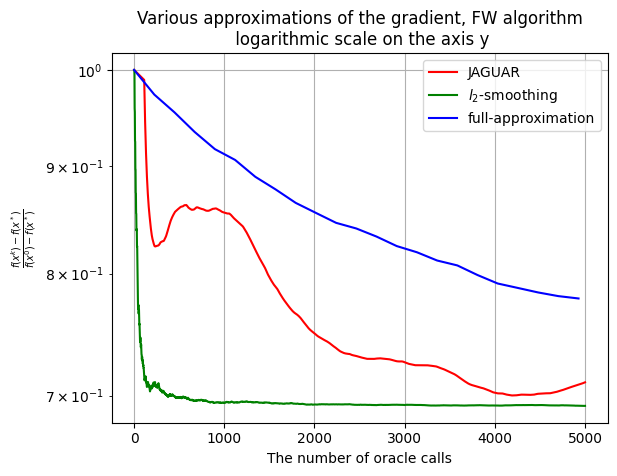

In [198]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_LogReg_L2_Mushrooms")

## Stochastic OPF FW LogReg on L2-ball (MNIST)

In [202]:
func_name = "logreg"
d = 719
seed = 42
sigma = 1
sett = L2Ball(radius=1)
L = 5.25

args = init_experiment(func_name, dataset="MNIST", d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [203]:
def learning_rate(k):
    return 1 / L

In [204]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|███████████████████████████████████████| 1000/1000 [00:40<00:00, 24.71it/s]


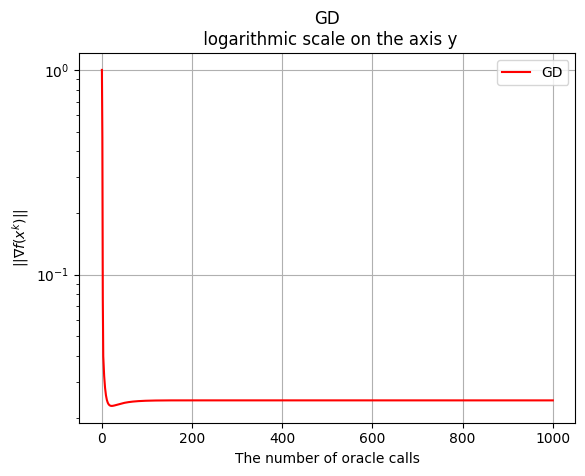

1.0


In [205]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [226]:
def learning_rate_jaguar(k):
    return 1 / (k + 500)

def learning_rate_lame(k):
    return 1 / (k + 200)

def learning_rate_turtle(k):
    return 1 / (k + 20)

In [227]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [228]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [229]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 3/3 [00:54<00:00, 18.33s/it]


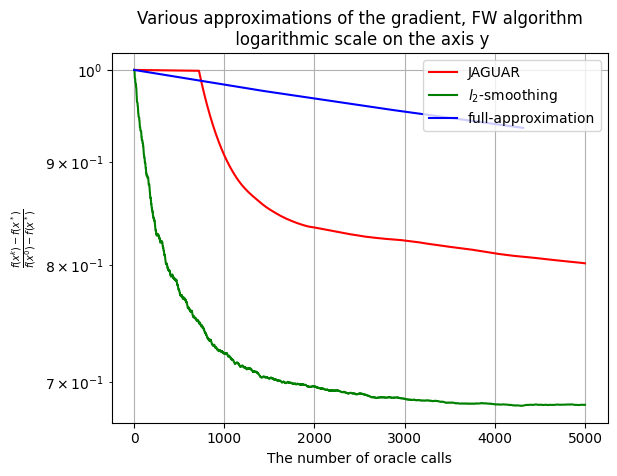

In [230]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_LogReg_L2_MNIST")

## Stochastic OPF FW Reg on L2-ball

In [231]:
func_name = "quadratic"
d = 200
seed = 101
sigma = 1
sett = L2Ball(radius=1)
L = 1000
mu = 1

args = init_experiment(func_name, d=d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [232]:
def learning_rate(k):
    return 1 / L

In [233]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**5)
GD.optimize()

100%|████████████████████████████████| 100000/100000 [00:04<00:00, 23404.15it/s]


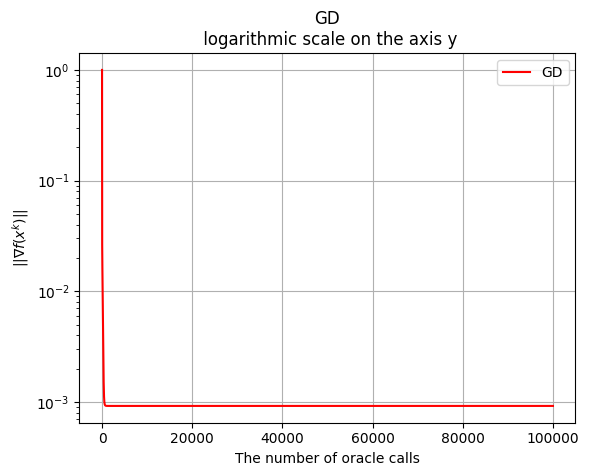

0.9999999999999999


In [234]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [235]:
def learning_rate_jaguar(k):
    return 1 / (k + 3)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [236]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [237]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [238]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**5)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████| 250/250 [00:04<00:00, 56.96it/s]


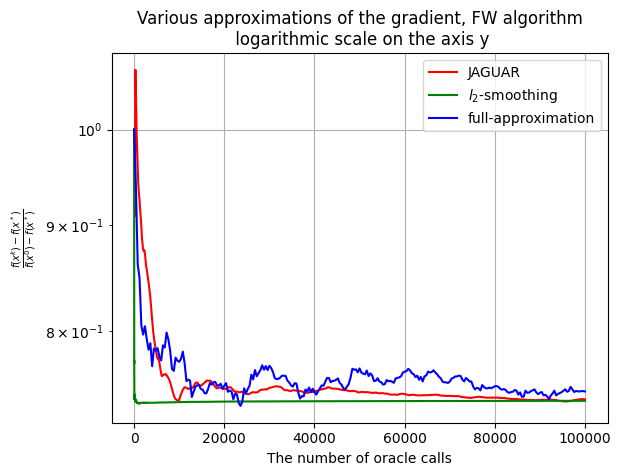

In [239]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_Reg_L2")

## Stochastic OPF FW SVM on L2-ball (Mushrooms)

In [339]:
func_name = "SVM"
d = 112
seed = 101
sigma = 1
sett = L2Ball(radius=1)

args = init_experiment(func_name, d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [340]:
def learning_rate_jaguar(k):
    return 1 / (k + 30)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [341]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [342]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [343]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**5)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████| 442/442 [00:11<00:00, 38.68it/s]


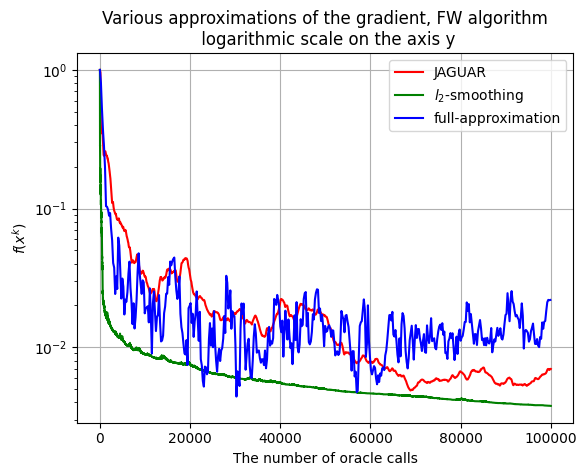

In [344]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_SVM_L2_Mushrooms")

## Stochastic OPF FW SVM on L2-ball (MNIST)

In [345]:
func_name = "SVM"
d = 719
seed = 101
sigma = 1
sett = L2Ball(radius=1)

args = init_experiment(func_name, dataset="MNIST", d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [356]:
def learning_rate_jaguar(k):
    return (np.sqrt(k) + 1) / (k + 30)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [357]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [358]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [361]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**5)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 69/69 [01:35<00:00,  1.38s/it]


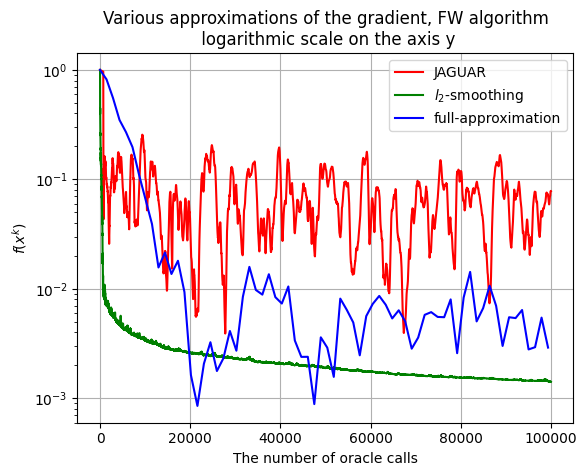

In [362]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_SVM_L2_MNIST")

## Stochastic TPF FW LogReg on L2-ball (Mushrooms)

In [363]:
func_name = "logreg"
d = 112
seed = 42
sigma = 1
sett = L2Ball(radius=1)
L = 5.25

args = init_experiment(func_name, d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [364]:
def learning_rate(k):
    return 1 / L

In [365]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|██████████████████████████████████████| 1000/1000 [00:06<00:00, 160.93it/s]


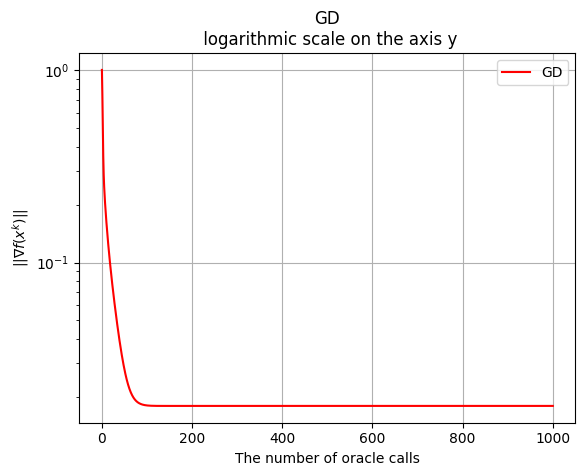

0.9999999999999999


In [366]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [367]:
def learning_rate_jaguar(k):
    return 1 / (k + 50)

def learning_rate_lame(k):
    return 1 / (k + 20)

def learning_rate_turtle(k):
    return 1 / (k + 20)

In [368]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [369]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [370]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 22/22 [00:09<00:00,  2.28it/s]


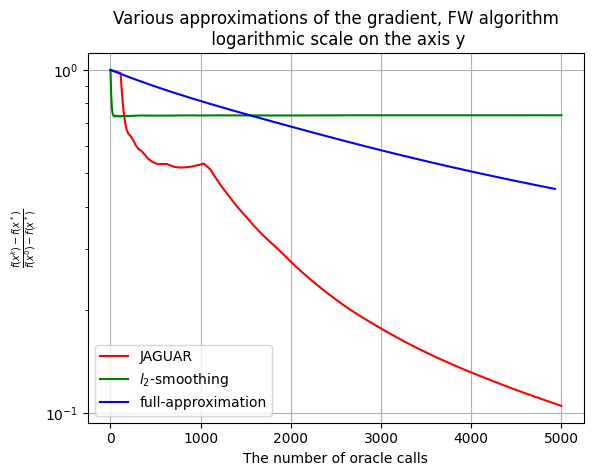

In [371]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_LogReg_L2_Mushrooms")

## Stochastic TPF FW LogReg on L2-ball (MNIST)

In [176]:
func_name = "logreg"
d = 719
seed = 42
sigma = 1
sett = L2Ball(radius=1)
L = 5.25

args = init_experiment(func_name, dataset="MNIST", d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [177]:
def learning_rate(k):
    return 1 / L

In [178]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|███████████████████████████████████████| 1000/1000 [00:32<00:00, 30.69it/s]


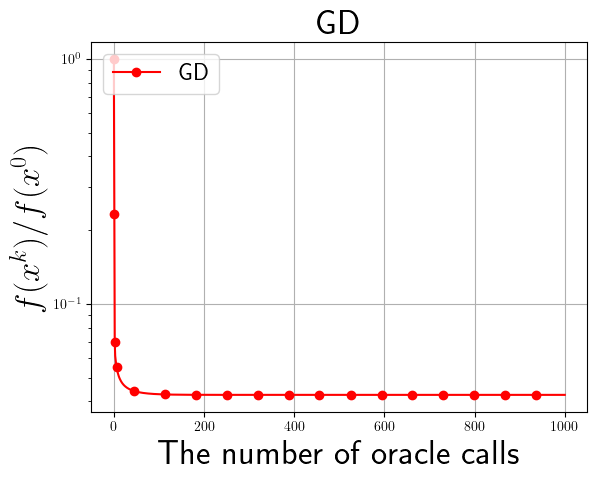

0.9999999999999997


In [179]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [214]:
def learning_rate_jaguar(k):
    return 1 / (k + 500)

def learning_rate_lame(k):
    return 2 / (k + 200)

def learning_rate_turtle(k):
    return 1 / (k + 20)

In [215]:
def momentum_k(k):
    return k / (k + 1)

In [216]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [217]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [01:49<00:00, 18.23s/it]


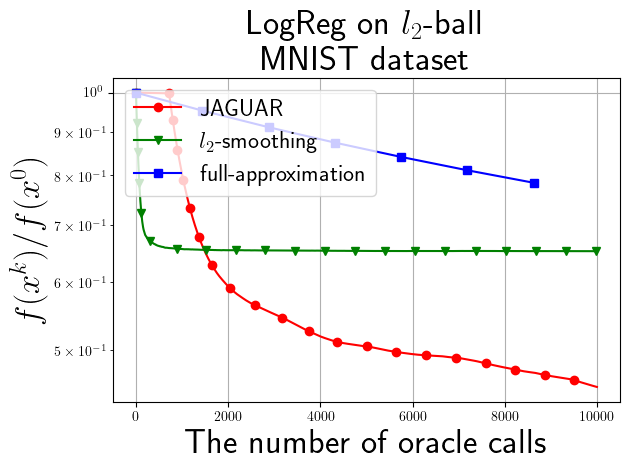

In [218]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_LogReg_L2_MNIST")

## Stochastic TPF FW Reg on L2-ball

In [381]:
func_name = "quadratic"
d = 200
seed = 101
sigma = 1
sett = L2Ball(radius=1)
L = 1000
mu = 1

args = init_experiment(func_name, d=d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [382]:
def learning_rate(k):
    return 1 / L

In [383]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**5)
GD.optimize()

100%|████████████████████████████████| 100000/100000 [00:04<00:00, 22486.31it/s]


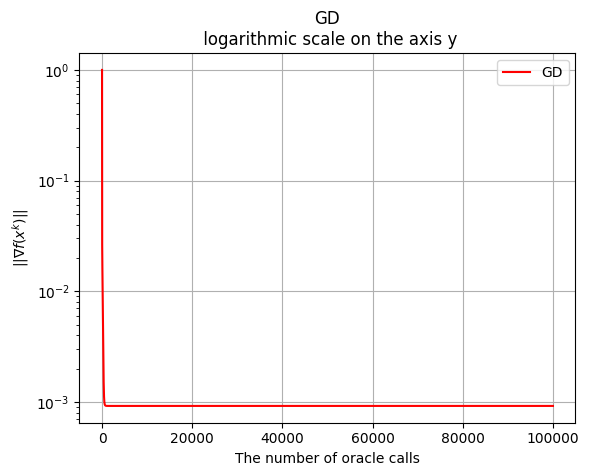

0.9999999999999999


In [384]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [385]:
def learning_rate_jaguar(k):
    return 1 / (k + 3)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [386]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [387]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [388]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**5)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████| 250/250 [00:03<00:00, 76.79it/s]


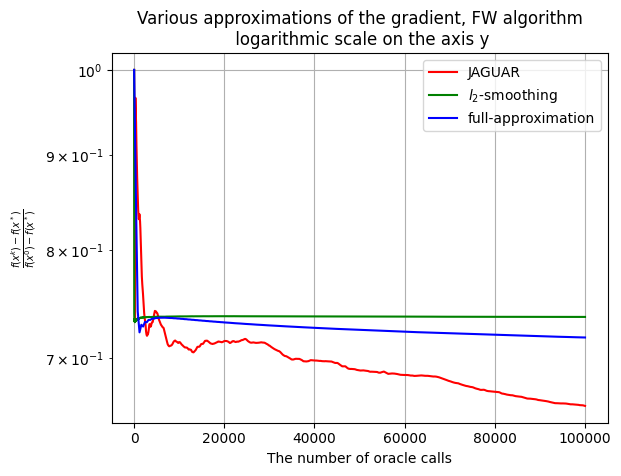

In [389]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_Reg_L2")

## Stochastic TPF FW SVM on L2-ball (Mushrooms)

In [390]:
func_name = "SVM"
d = 112
seed = 101
sigma = 1
sett = L2Ball(radius=1)

args = init_experiment(func_name, d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [391]:
def learning_rate_jaguar(k):
    return 1 / (k + 30)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [392]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [393]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [394]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**5)
    opt.optimize()
    optimizers_list.append(opt)

 13%|████▋                               | 6495/49944 [00:03<00:22, 1938.10it/s]


Precision 1e-06 achieved at step 6495!


 67%|███████████████████████▌           | 33607/50000 [00:13<00:06, 2484.80it/s]


Precision 1e-06 achieved at step 33607!


100%|█████████████████████████████████████████| 442/442 [00:13<00:00, 33.64it/s]


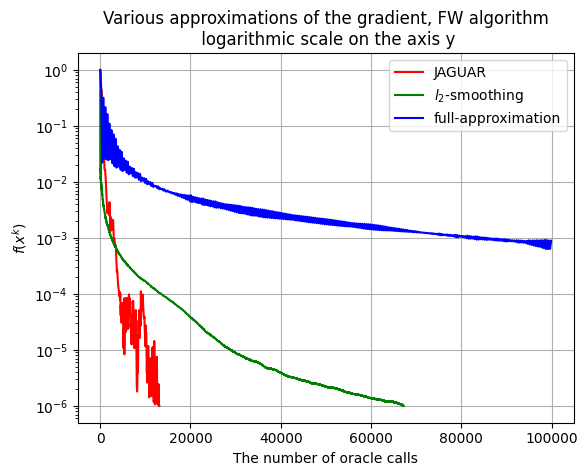

In [395]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_SVM_L2_Mushrooms")

## Stochastic TPF FW SVM on L2-ball (MNIST)

In [219]:
func_name = "SVM"
d = 719
seed = 101
sigma = 1
sett = L2Ball(radius=1)

args = init_experiment(func_name, dataset="MNIST", d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [406]:
def learning_rate_jaguar(k):
    return 1.2 / (k + 4500)

def learning_rate_lame(k):
    return 1 / (2 * k + 2400)

def learning_rate_turtle(k):
    return 1 / (k + 15)

In [407]:
def momentum_k(k):
    return k / (k + 10)

In [408]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [409]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [00:05<00:00,  1.05it/s]


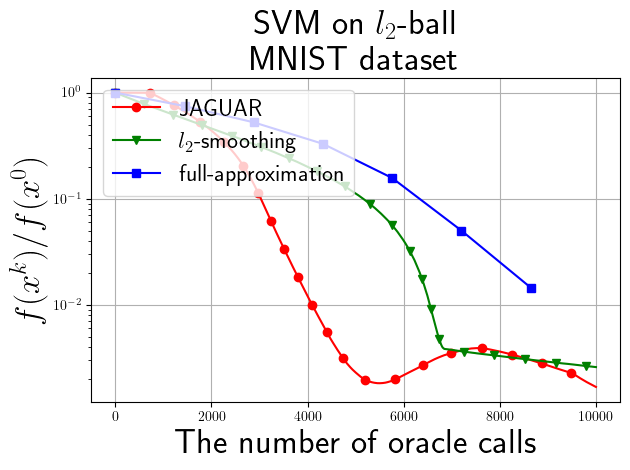

In [410]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_SVM_L2_MNIST")